[b'.\\data\\data0.tfrecord' b'.\\data\\data1.tfrecord'
 b'.\\data\\data2.tfrecord' b'.\\data\\data3.tfrecord'
 b'.\\data\\data4.tfrecord' b'.\\data\\data5.tfrecord'
 b'.\\data\\data6.tfrecord' b'.\\data\\data7.tfrecord'
 b'.\\data\\data8.tfrecord' b'.\\data\\data9.tfrecord']
---第1批图像---
-第1批图像中的第1张:标签为5-


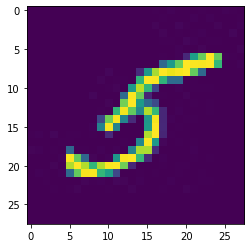

-第1批图像中的第2张:标签为3-


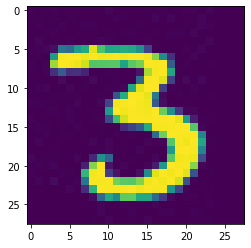

-第1批图像中的第3张:标签为8-


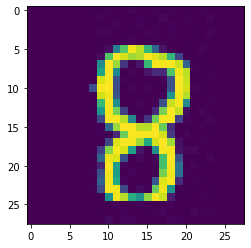

---第2批图像---
-第2批图像中的第1张:标签为2-


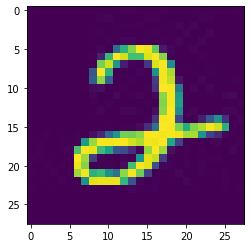

-第2批图像中的第2张:标签为2-


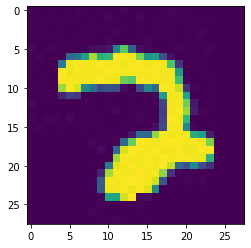

-第2批图像中的第3张:标签为2-


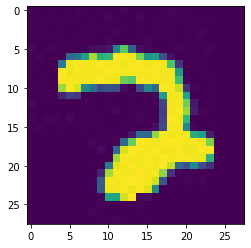

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
H,W = 28,28
#得到文件夹 ./data/ 下的所有tfRecord文件
files = tf.train.match_filenames_once(os.path.curdir + '/data/' + "data*.tfrecord")
# 创建TFRcordReader对象
reader = tf.TFRecordReader()
records_queue=tf.train.string_input_producer(files,num_epochs=2)
_,serialized_example = reader.read(records_queue)
# 解析文件中的图像及其对应的标签
features=tf.parse_single_example(
    serialized_example,
    features={
        'img_raw':tf.FixedLenFeature([] ,tf.string),
        'label': tf.FixedLenFeature([], tf.int64),
    }
)

# 解码二进制
img_raw = features['img_raw']
img_raw = tf.decode_raw(img_raw,tf.uint8)
# 转换成图片
img=tf.reshape(img_raw,[H,W])
#标签
label=features['label']
label = tf.cast(label,tf.int64)
#每次从文件中读取3张图片
BatchSize=3
img,label=tf.train.shuffle_batch([img,label] , BatchSize, 1000 + 3*BatchSize, 1000)
session = tf.Session()
session.run(tf.global_variables_initializer())
session.run(tf.local_variables_initializer())
coord=tf.train.Coordinator()
threads=tf.train.start_queue_runners(sess=session, coord=coord)
print(session.run(files))
# 循环2次解析文件流中的数据
for i in range(2):
    print('---第%(num)d批图像---'%{'num':i+1})
    imgs,labels = session.run([img,label])
    for j in range(BatchSize):
        print('-第%(num)d批图像中的第%(index)d张:标签为%(l)d-' %{'num':i+1, 'index':j+1 , 'l':labels[j]})
        plt.imshow(imgs[j,:,:])
        plt.show()
        
coord.request_stop()
coord.join(threads)
session.close()